Task 3: Predictive Analytics for Resource Allocation

Dataset: Use Kaggle Breast Cancer Dataset.

Goal:

Preprocess data (clean, label, split).

Train a model (e.g., Random Forest) to predict issue priority (high/medium/low).

Evaluate using accuracy and F1-score.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

base_path = '/content/drive/MyDrive/Colab Notebooks/complete_set'

print("Training Set Files:")
print(os.listdir(os.path.join(base_path, 'training_set')))

print("\nTesting Set Files:")
print(os.listdir(os.path.join(base_path, 'testing_set')))



Training Set Files:
['malignant', 'benign']

Testing Set Files:
['P038_mask.png', 'P043_mask.png', 'P025.png', 'P006.png', 'P029_mask.png', 'P014_mask.png', 'P024_mask.png', 'P031.png', 'P034.png', 'P040_mask.png', 'P012.png', 'P025_mask.png', 'P040.png', 'P008_mask.png', 'P033.png', 'P002_mask.png', 'P032.png', 'P010.png', 'P028_mask.png', 'P026.png', 'P046.png', 'P007_mask.png', 'P004_mask.png', 'P037.png', 'P026_mask.png', 'P035.png', 'P037_mask.png', 'P003.png', 'P013_mask.png', 'P008.png', 'P036.png', 'P003_mask.png', 'P023_mask.png', 'P031_mask.png', 'P044_mask.png', 'P009_mask.png', 'P021.png', 'P027_mask.png', 'P032_mask.png', 'P018.png', 'P016.png', 'P017_mask.png', 'P009.png', 'P035_mask.png', 'P002.png', 'P019_mask.png', 'P038.png', 'P017.png', 'P041_mask.png', 'P001.png', 'P033_mask.png', 'P039_mask.png', 'P044.png', 'P042_mask.png', 'P007.png', 'P012_mask.png', 'P023.png', 'P043.png', 'P029.png', 'P020_mask.png', 'P024.png', 'P005_mask.png', 'P004.png', 'P022.png', 'P020.p

In [ ]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

# Path setup
benign_dir = '/content/drive/MyDrive/Colab Notebooks/complete_set/training_set/benign'
malignant_dir = '/content/drive/MyDrive/Colab Notebooks/complete_set/training_set/malignant'

# Image size
IMG_SIZE = (128, 128)

# Data containers
X = []
y = []

# Load benign
for img_name in os.listdir(benign_dir):
    img_path = os.path.join(benign_dir, img_name)
    img = Image.open(img_path).convert('RGB').resize(IMG_SIZE)
    X.append(np.array(img))
    y.append(0)  # Label for benign

# Load malignant
for img_name in os.listdir(malignant_dir):
    img_path = os.path.join(malignant_dir, img_name)
    img = Image.open(img_path).convert('RGB').resize(IMG_SIZE)
    X.append(np.array(img))
    y.append(1)  # Label for malignant

 # Normalize
X = np.array(X) / 255.0
y = np.array(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import numpy as np

# 1. Define Input Shape
IMG_SHAPE = (128, 128, 3)

# 2. Load Pretrained MobileNetV2
base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base layers

# 3. Add Custom Layers
inputs = Input(shape=IMG_SHAPE)
x = base_model(inputs, training=False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)

# 4. Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 5. Compute Class Weights
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_array))

# 6. Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 7. Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=32,
    class_weight=class_weights,
    callbacks=[early_stop]
)





9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_128            │ (None, 4, 4, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 24s 627ms/step - accuracy: 0.6178 - loss: 0.7509 - val_accuracy: 0.7399 - val_loss: 0.4882
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 502ms/step - accuracy: 0.7478 - loss: 0.5259 - val_accuracy: 0.7578 - val_loss: 0.4360
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 467ms/step - accuracy: 0.7779 - loss: 0.4694 - val_accuracy: 0.8206 - val_loss: 0.3530
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 467ms/step - accuracy: 0.8024 - loss: 0.4138 - val_accuracy: 0.8430 - val_loss: 0.3193
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 511ms/step - accuracy: 0.8530 - loss: 0.3539 - val_accuracy: 0.8251 - val_loss: 0.3548
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 13s 481ms/step - accuracy: 0.8395 - loss: 0.3581 - val_accuracy: 0.8520 - val_loss: 0.2923
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 475ms/step - accuracy: 0.8305 - loss: 0.3744 - val_accuracy: 0.8386 - val_loss: 0.3165
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 468ms/step - accuracy: 0.8511 - loss: 0.3154 - val_accu

In [ ]:

from sklearn.metrics import classification_report, f1_score

# Predict
y_pred = model.predict(X_val) > 0.5  # Threshold
print(classification_report(y_val, y_pred, target_names=["Benign", "Malignant"]))
print("F1 Score (macro):", f1_score(y_val, y_pred, average='macro'))

7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
              precision    recall  f1-score   support

      Benign       0.94      0.84      0.89       159
   Malignant       0.69      0.88      0.77        64

    accuracy                           0.85       223
   macro avg       0.82      0.86      0.83       223
weighted avg       0.87      0.85      0.86       223

F1 Score (macro): 0.8313896208042157


In [ ]:
test_dir = '/content/drive/MyDrive/Colab Notebooks/complete_set/testing_set'
IMG_SIZE = (128, 128)

from PIL import Image
import numpy as np
import os

test_images = []
file_names = []

for fname in os.listdir(test_dir):
    if fname.endswith('.png'):
        img = Image.open(os.path.join(test_dir, fname)).convert('RGB').resize(IMG_SIZE)
        test_images.append(np.array(img) / 255.0)
        file_names.append(fname)

X_test = np.array(test_images)

# Predict using the trained model
preds = (model.predict(X_test) > 0.5).astype(int).flatten()

# Convert 0 and 1 back to class labels
labels = ['Benign', 'Malignant']
predicted_labels = [labels[p] for p in preds]

# Show a few
for i in range(5):
    print(f"{file_names[i]} => {predicted_labels[i]}")




7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step
P038_mask.png => Malignant
P043_mask.png => Malignant
P025.png => Malignant
P006.png => Benign
P029_mask.png => Benign


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step


/tmp/ipython-input-14-1846891326.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  confidence = float(probs[i])


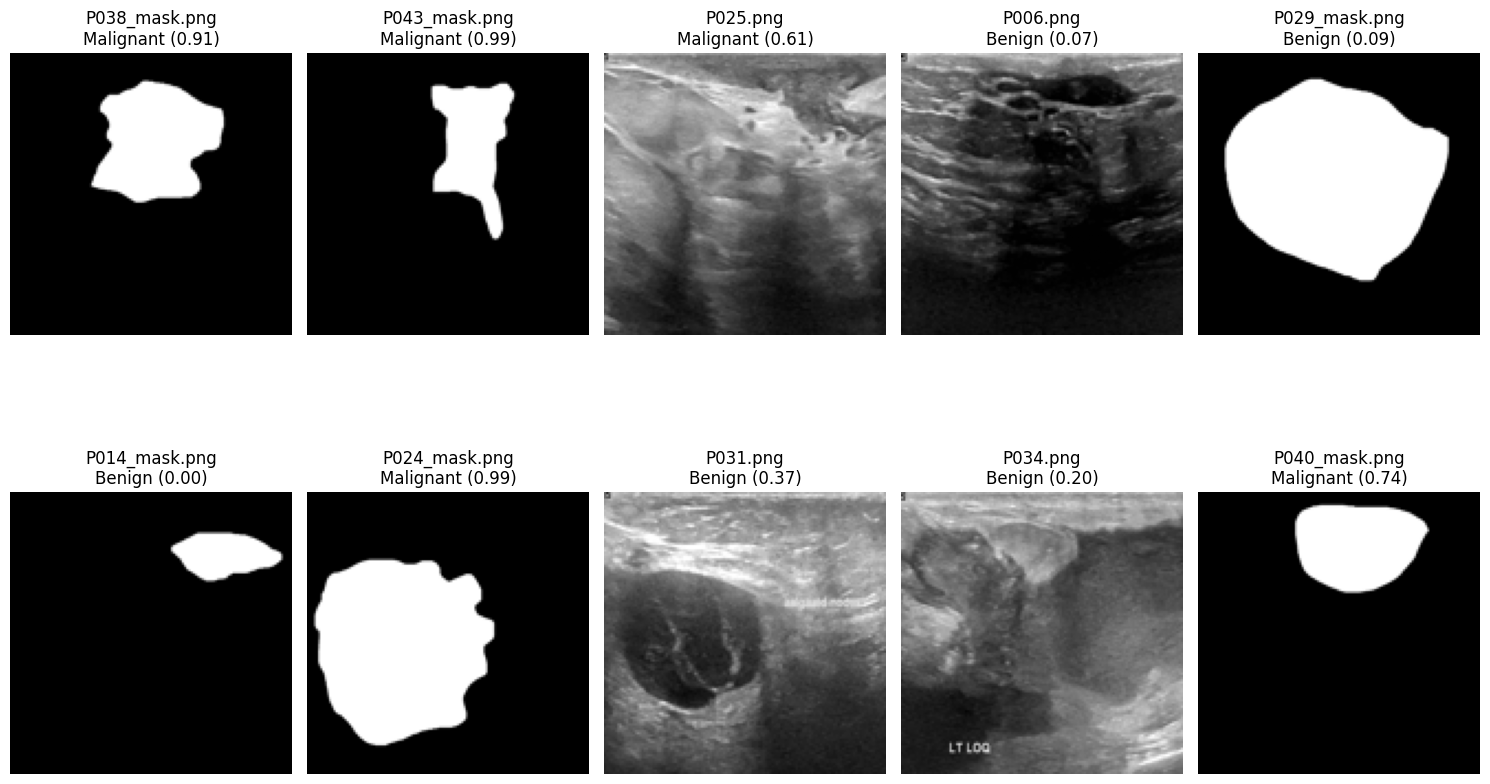

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


probs = model.predict(X_test)

# Plot with confidence
plt.figure(figsize=(15, 10))

for i in range(10):
    confidence = float(probs[i])
    label_idx = int(confidence > 0.5)
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"{file_names[i]}\n{labels[label_idx]} ({confidence:.2f})")
    plt.axis('off')

plt.tight_layout()
plt.show()


